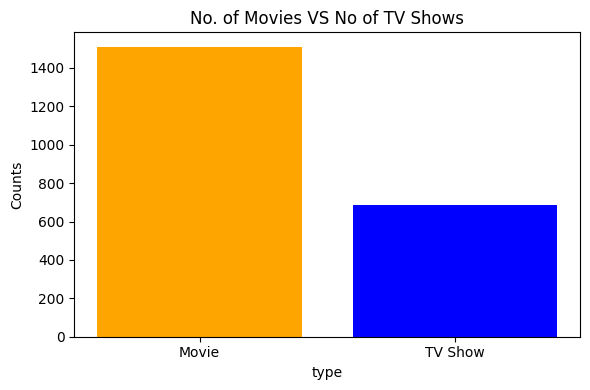

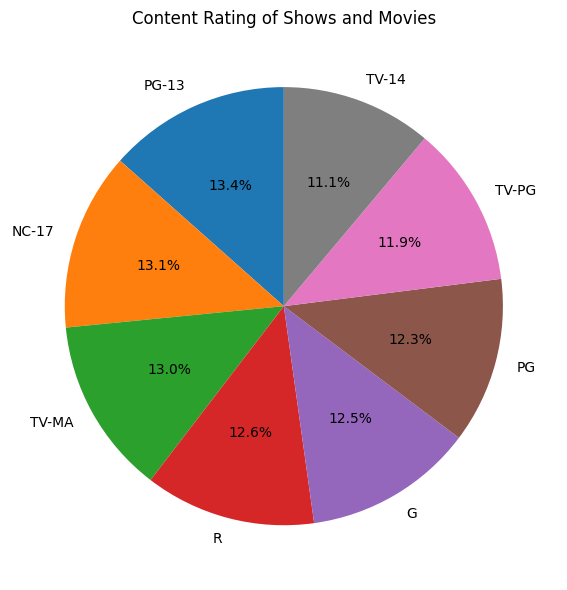

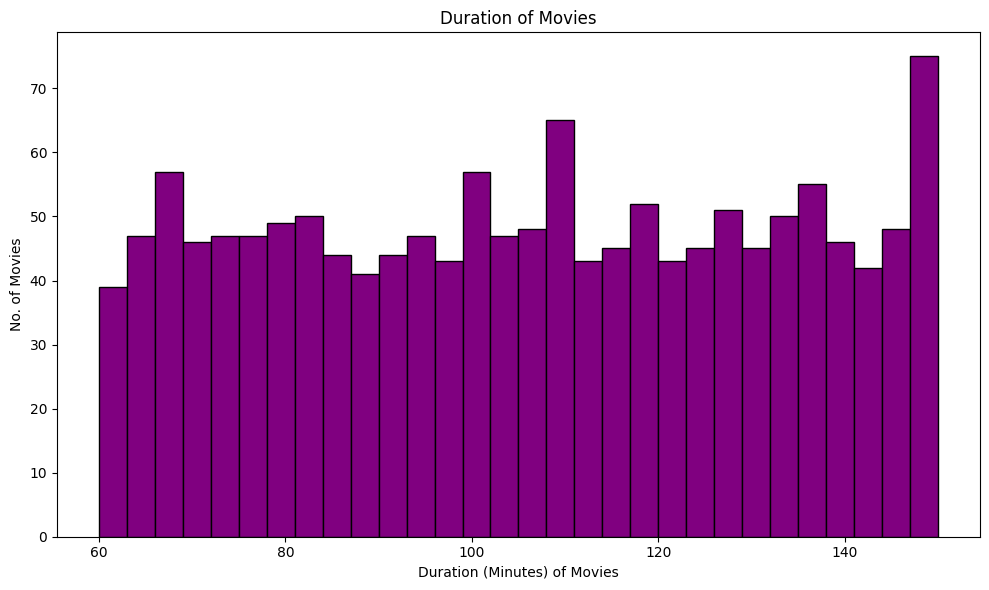

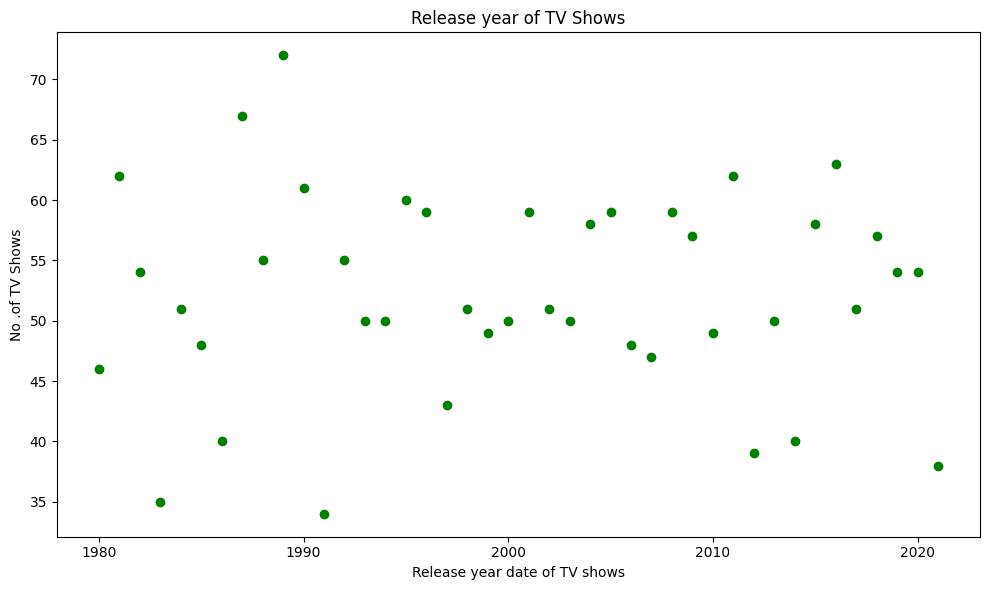

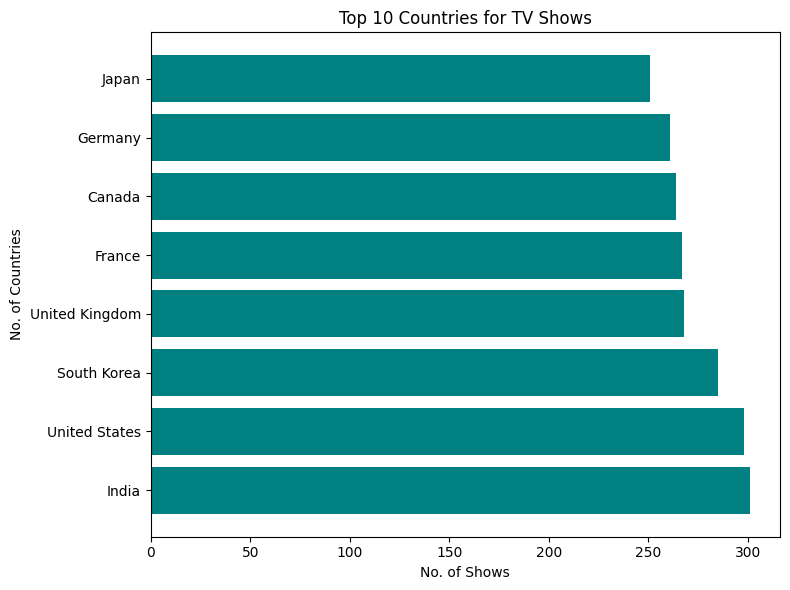

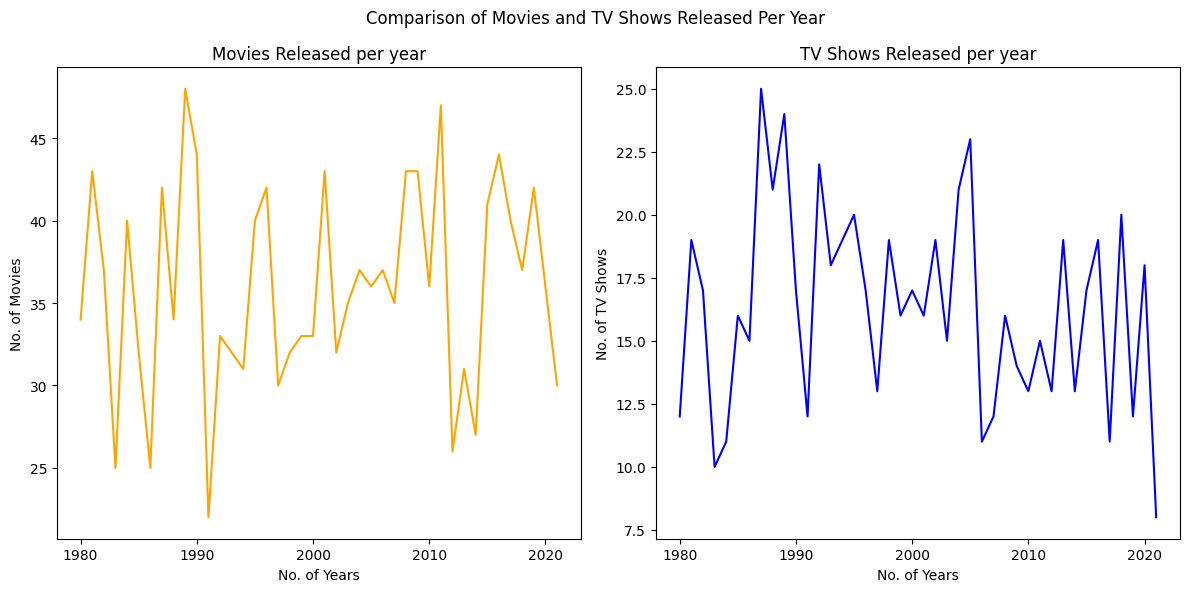

In [1]:
import pandas as pd                
import matplotlib.pyplot as plt                       

df = pd.read_csv('netflix_dataset_with_errors.csv')
# print(df.head())
# print(df.info())

# to clean data 

df = df.dropna(subset=['show_id','type','title','director','cast','country','data_added','release_year','rating','listed_in','description','duration'])
# number of movies and tv series show

type_counts = df ['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values , color = ['orange','blue'])
plt.title('No. of Movies VS No of TV Shows')
plt.xlabel('type')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('movies vs tv shows.png')
plt.show()

# pie_chart of ratings 


rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts , labels=rating_counts.index, autopct='%1.1f%%',startangle=90)
plt.title('Content Rating of Shows and Movies')
plt.tight_layout()
plt.savefig('Content_Ratings.png')
plt.show()

#DISTRIBUTED DURATION OF MOVIE USING HISTOGRAM

# Filter only Movies
movie_df = df[df['type'] == 'Movie'].copy()

# Remove 'min' and strip spaces
movie_df['duration_clean'] = movie_df['duration'].str.replace('min', '', regex=False).str.strip()

# Filter only numeric durations (remove 'unknown', 'N/A', etc.)
movie_df = movie_df[movie_df['duration_clean'].str.isnumeric()]

# Convert to integer
movie_df['duration_int'] = movie_df['duration_clean'].astype(int)

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Duration of Movies')
plt.xlabel('Duration (Minutes) of Movies')
plt.ylabel('No. of Movies')
plt.tight_layout()
plt.savefig('Duration_Movies.png')
plt.show()

# release year vs number of shows # scatterplot

release_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_year.index,release_year.values,color = 'green' )
plt.title('Release year of TV Shows')
plt.xlabel('Release year date of TV shows')
plt.ylabel('No .of TV Shows')
plt.tight_layout()
plt.savefig('Release Year of TV show.png')
plt.show()

# top 10 countries which provide most shows (BARCHART)

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color = 'teal')
plt.title("Top 10 Countries for TV Shows")
plt.xlabel('No. of Shows')
plt.ylabel('No. of Countries')
plt.tight_layout()
plt.savefig('TV_Shows_for_Countires.png')
plt.show()


# movies vs tv shows released per years plot (linechart)

#grouping
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig , ax = plt.subplots(1,2, figsize = (12,6))

# subplot 1 for movie
ax[0].plot(content_by_year.index,content_by_year['Movie'],color = 'orange')
ax[0].set_title('Movies Released per year')
ax[0].set_xlabel('No. of Years')
ax[0].set_ylabel('No. of Movies')

#subplot 2 for TV Show
ax[1].plot(content_by_year.index,content_by_year['TV Show'],color = 'blue')
ax[1].set_title('TV Shows Released per year')
ax[1].set_xlabel('No. of Years')
ax[1].set_ylabel('No. of TV Shows')


plt.suptitle('Comparison of Movies and TV Shows Released Per Year')
plt.tight_layout()
plt.savefig('TV_Shows and Movies_Released_Per_Year.png')
plt.show()